### Import custom libraries

In [1]:
import image_processing
import data_preparation
import deep_learning
import aux

### Install the required libraries not installed in system

In [2]:
## pandas
if aux.checkLibraryInstalled('pandas') == False:
    !pip install pandas
    
## skicit-leatn
if aux.checkLibraryInstalled('sklearn') == False:
    !pip install -U scikit-learn

## matplotlib
if aux.checkLibraryInstalled('matplotlib') == False:
    !pip install matplotlib

## numpy
if aux.checkLibraryInstalled('numpy') == False:
    !pip install numpy

## yellowBrick
if aux.checkLibraryInstalled('yellowbrick') == False:
    !pip install yellowbrick

## pyts.image
if aux.checkLibraryInstalled('pyts') == False:
    !pip install pyts





pandas
pandas already installed
sklearn
sklearn already installed
matplotlib
matplotlib already installed
numpy
numpy already installed
yellowbrick
yellowbrick already installed
pyts
pyts already installed


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

#### Week consumptions with next_day_cluster

In [3]:
data = pd.read_csv ("../data/previos7.csv",sep=";",header=None)
data = data.iloc[:,1:] 
data.columns = [*data.columns[:-1], 'next_day_cluster']
data

,1,2,3,4,5,6,7,8,9,10,...,160,161,162,163,164,165,166,167,168,next_day_cluster
0,217,167,181,189,204,322,221,247,174,208,...,159,187,186,161,2658,1748,957,421,218,0
1,177,172,184,179,186,271,255,236,328,167,...,184,178,162,412,2938,848,926,1999,415,5
2,168,215,165,181,202,328,313,226,203,190,...,201,179,159,498,1015,757,620,1131,279,5
3,163,208,200,157,202,318,286,563,197,176,...,152,199,195,152,195,335,1105,685,205,5
4,214,202,164,202,151,316,256,145,190,215,...,163,200,197,160,207,200,181,174,193,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,174,169,175,172,152,188,409,336,251,147,...,150,143,119,149,135,131,121,144,149,5
493,192,171,191,194,166,308,1570,1397,196,164,...,145,125,143,151,124,121,172,121,121,5
494,173,149,172,177,148,284,419,1678,711,171,...,147,153,122,153,122,155,148,133,142,5
495,177,172,194,150,171,153,168,424,551,2944,...,127,173,123,157,127,157,146,154,129,5


### Week consumptions without next_day_cluster column

It will be necessary to generate the 2D images for each week consumption time serie.

In [4]:
data_with_no_next_day_row = data.iloc[: , :-1]

In [5]:
data_with_no_next_day_row

,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,217,167,181,189,204,322,221,247,174,208,...,179,159,187,186,161,2658,1748,957,421,218
1,177,172,184,179,186,271,255,236,328,167,...,174,184,178,162,412,2938,848,926,1999,415
2,168,215,165,181,202,328,313,226,203,190,...,152,201,179,159,498,1015,757,620,1131,279
3,163,208,200,157,202,318,286,563,197,176,...,190,152,199,195,152,195,335,1105,685,205
4,214,202,164,202,151,316,256,145,190,215,...,155,163,200,197,160,207,200,181,174,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,174,169,175,172,152,188,409,336,251,147,...,120,150,143,119,149,135,131,121,144,149
493,192,171,191,194,166,308,1570,1397,196,164,...,147,145,125,143,151,124,121,172,121,121
494,173,149,172,177,148,284,419,1678,711,171,...,124,147,153,122,153,122,155,148,133,142
495,177,172,194,150,171,153,168,424,551,2944,...,158,127,173,123,157,127,157,146,154,129


### Example of hourly consumptions time serie for a week of a random consumer

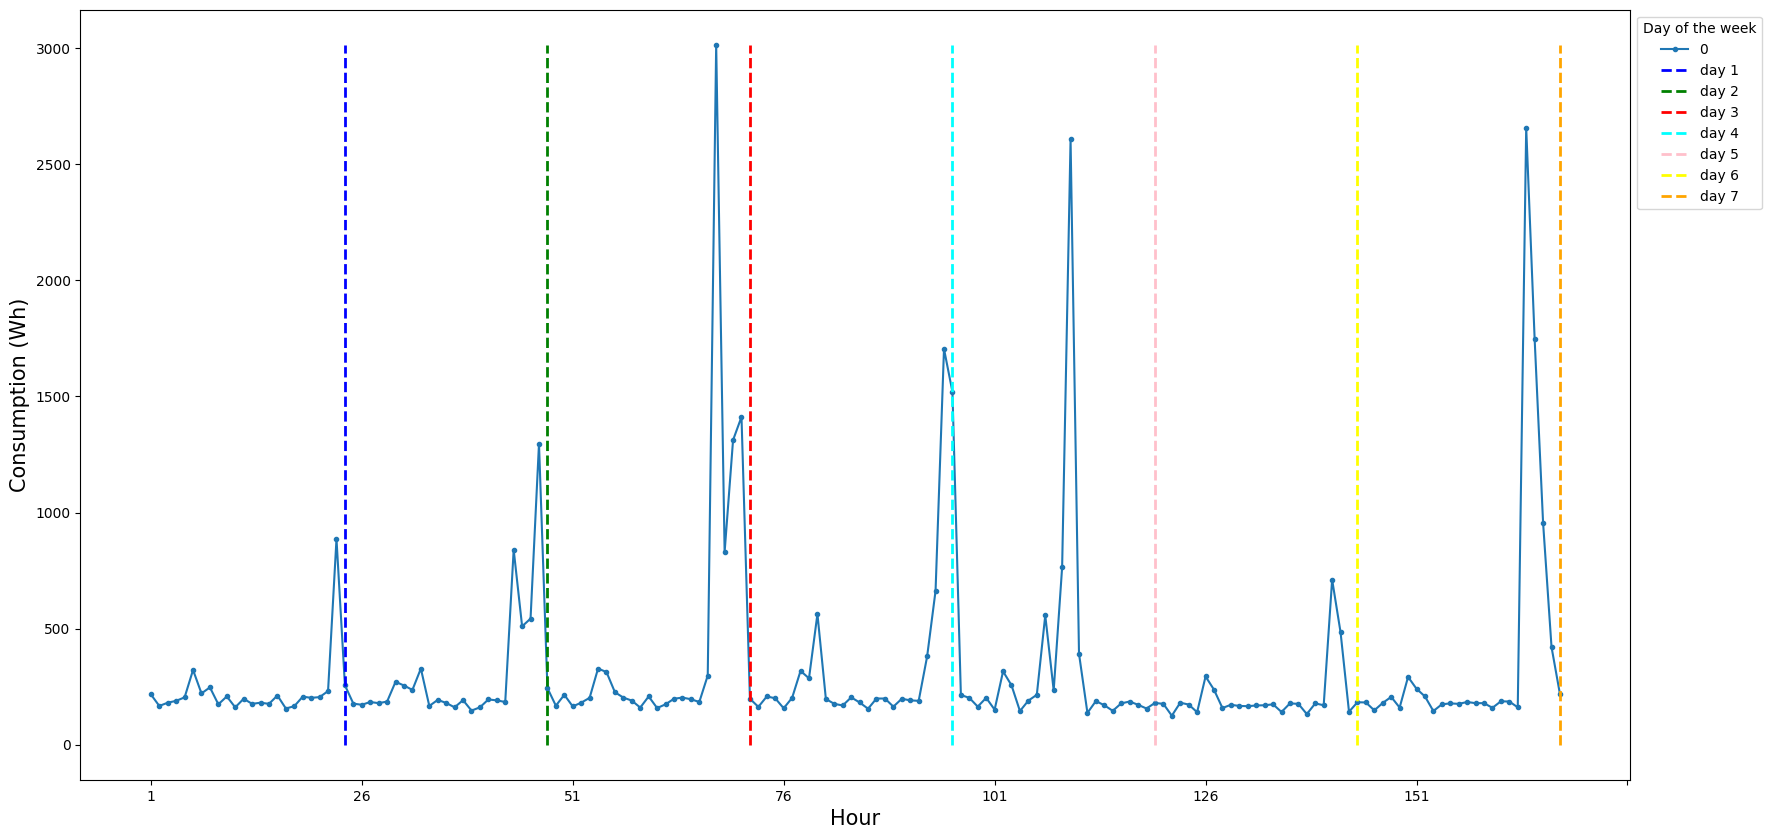

In [8]:
rowTS = (data_with_no_next_day_row.iloc[0])
aux.plotTimeSeriesWithWeekSeparator(rowTS)

### Centroids for next day curves

Load 21 centroid model from Ireland

In [6]:
from array import array

centroids = [ [ 666.40479893,  484.33481247,  403.49585082,  370.5242449 ,
         363.99568771,  391.12255842,  496.10640185,  659.05330929,
         732.29261459,  661.01002998,  626.41878595,  557.36233516,
         555.74481743,  628.43159322,  623.64899298,  647.05002927,
         688.73262013,  989.96810246, 1397.61470245, 1526.12345439,
        1467.50739569, 1424.30494595, 1277.73625541, 1007.61093758],
 [7988.88639466, 7268.74730775, 6804.77445776, 6640.17503413,
        6434.40785682, 6337.86303655, 6328.51327165, 6650.20203246,
        7212.94342484, 7726.6173214 , 8306.49582891, 8685.71105718,
        9029.67844684, 8995.13635674, 9000.76566055, 8950.58956469,
        9127.54664038, 9296.29713332, 9482.04307599, 9707.37919005,
        9684.54300015, 9512.9323525 , 8907.89276505, 8432.03579554],
 [5063.53569443, 4365.20704993, 3896.86967641, 3597.82525297,
        3459.25408651, 3456.88007339, 3567.78494385, 3849.55665518,
        4187.1664628 , 4334.57300122, 4484.80946292, 4604.65072834,
        4891.90164572, 4842.72334038, 4875.54475703, 5077.23446014,
        5581.56388302, 6209.94340042, 6724.0742244 , 7015.64422328,
        7026.27376849, 6932.77082175, 6616.3797954 , 5979.58968086],
 [ 664.64971722,  484.24338371,  403.54985479,  369.60886776,
         362.38005281,  393.0481233 ,  495.5519526 ,  690.89894635,
         841.49293436,  824.32571513,  840.90577216,  814.3801635 ,
         856.04135019,  902.06588095,  901.49747788, 1392.20289267,
        2653.60199451, 2977.45762989, 1610.71474955, 1378.71938267,
        1351.9737931 , 1336.13024388, 1202.78810991,  964.67879676],
 [8317.06892543, 8494.768477  , 8141.3019432 , 7593.31971433,
        6861.97176549, 6048.78790899, 5365.8445441 , 4482.35459226,
        2397.45523999, 2033.88739412, 2330.18285999, 2274.50357084,
        2217.54658695, 2044.82710513, 2013.83341638, 1976.31772131,
        1890.80468361, 1553.51934895, 1301.88290982, 1304.58379007,
        1332.65819631, 1404.31954825, 1763.12771965, 5746.45308088],
 [320.96178046, 255.8529408 , 229.07278026, 219.64003234,
        219.84097373, 230.34301883, 278.94034518, 365.18098082,
        400.59031706, 395.79920081, 372.54551802, 340.40825456,
        343.47485796, 352.78843204, 339.48136236, 350.84684382,
        383.45530162, 445.23904749, 459.05602476, 460.7941184 ,
        481.0623598 , 508.57178647, 488.21405724, 411.43217114],
 [ 744.03409614,  531.72816415,  450.16188436,  419.39059399,
         413.72691544,  434.3549074 ,  511.50830058,  770.96687654,
        2036.33027511, 4275.53008057, 2376.44072609, 1269.39402463,
        1136.45864168, 1099.6225371 , 1008.03069178, 1040.88979876,
        1179.39464241, 1439.46789521, 1541.92177868, 1564.42676691,
        1509.7273492 , 1470.47353409, 1314.84056047, 1037.55479173],
 [1601.16603784, 1170.65591189,  959.14439882,  878.8354325 ,
         843.33421184,  861.24551961, 1003.8459191 , 1423.54288964,
        2003.28488598, 2671.09454586, 3392.50585363, 3846.09160517,
        4295.97386673, 4593.98673917, 4619.61335516, 4631.94401598,
        4846.79961716, 5423.64528658, 5400.69708151, 4917.79620485,
        4308.65682739, 3766.67399989, 3124.9490096 , 2392.10758475],
 [3143.24018488, 2796.65769111, 2539.80058164, 2408.06945887,
        2377.95899979, 2403.00059722, 2524.84233486, 2824.19295285,
        2941.967984  , 2819.09906003, 2755.33350644, 2713.53733901,
        2693.8324678 , 2662.73995118, 2571.32922206, 2558.56930307,
        2656.32319796, 2854.96917844, 2976.30460636, 2999.86770357,
        3070.49085999, 3190.84841088, 3166.72546219, 3052.21214167],
 [ 924.00874251,  661.89334664,  548.39566201,  500.16010645,
         487.6160346 ,  507.34621424,  590.92546906,  818.70312708,
        1197.05776447, 1920.45172322, 4071.36357951, 4294.43602129,
        2469.61630073, 1647.86794411, 1424.84790419, 1408.84958084,
        1557.61201597, 1876.66726547, 1996.53409182, 2021.52737192,
        1928.34179641, 1826.09276114, 1607.99800399, 1261.05015303],
 [ 812.21019229,  574.68051668,  472.65269536,  433.00153241,
         427.64155564,  469.31139442,  633.07503918,  959.77076803,
        1098.21715461,  991.33350593,  982.19459528,  955.48468988,
         992.90856611, 1049.9502701 ,  969.16469576, 1005.36742891,
        1312.31778997, 2916.27394481, 4615.82014107, 3177.27366491,
        2249.42958604, 1897.53034035, 1592.4525932 , 1210.68650638],
 [ 642.57734751,  483.99367229,  403.49586352,  370.68959448,
         359.51990161,  370.07461016,  416.89810214,  523.60774039,
         728.8428407 ,  929.33392458, 1341.47870377, 1737.51633606,
        2046.35477174, 1563.61767427, 1046.05980638,  909.43473924,
         878.26403538,  957.53414122,  980.66428813,  948.69999323,
         956.18663598,  993.69464491,  951.83177397,  803.69112901],
 [ 878.4607494 ,  650.14644639,  533.69427373,  472.9124521 ,
         452.51305039,  463.77182597,  528.63582713,  700.44790688,
         930.56599306, 1070.47802943, 1222.95578772, 1297.33524329,
        1498.10612031, 2541.81275757, 3764.96807895, 3080.80275287,
        1989.60919312, 1668.09438038, 1638.56510737, 1642.48099378,
        1590.33541501, 1571.93889632, 1436.67476141, 1183.35150206],
 [1214.39438737, 1128.04979955, 1082.22638436, 1067.5663994 ,
        1058.08312453, 1050.55712854, 1090.87214984, 1445.62189927,
        3157.46172638, 7300.26265347, 8970.56746429, 9258.00745427,
        9114.90967176, 8316.58926334, 8724.38893761, 8678.63148334,
        8195.13248559, 6048.81589827, 2487.61644951, 1572.3070659 ,
        1318.12722375, 1259.56840391, 1214.6663117 , 1195.21485843],
 [3727.43318769, 3534.45903878, 3398.14127071, 3392.89249954,
        3368.24003277, 3374.38494447, 3544.37156381, 4360.42799927,
        6742.08747497, 9087.88376115, 9860.98124886, 9872.27571455,
        9851.59894411, 9491.13890406, 9352.42508647, 9260.12980157,
        9077.31139632, 7964.41307118, 6086.85882032, 5149.9208083 ,
        4354.26697615, 3901.54951757, 3563.21017659, 3571.9576734 ],
 [ 913.61542846,  781.63053205,  724.87335784,  706.45008692,
         704.80832692,  716.9262489 ,  825.49348836, 1145.99270468,
        2275.2919837 , 4475.50676812, 5440.60058135, 5554.70519506,
        5347.03126158, 4596.07266821, 4666.11293494, 4441.23652788,
        4042.72155253, 2942.87446924, 1637.88943034, 1323.41953777,
        1210.021373  , 1164.52400901, 1074.35912342,  965.97936793],
 [1104.78540487,  744.46498413,  585.5849443 ,  523.93598681,
         506.04348665,  541.99653327,  676.98950022,  969.2010145 ,
        1072.42832514,  945.66657746,  950.52198917,  937.85971868,
         967.88452107, 1014.9711396 ,  960.02245597, 1022.0998444 ,
        1160.32115516, 1427.85995519, 1800.21212423, 2745.17020601,
        3488.90814713, 3503.88833634, 2835.28454596, 1999.12927118],
 [1046.19702105,  743.46590955,  592.95869175,  524.10774715,
         499.38476497,  514.20733799,  593.71533901,  795.06843747,
        1088.80015664, 1319.82150622, 1615.09671452, 2615.47429544,
        4912.85032342, 3966.45790177, 2197.99292399, 1708.58566162,
        1698.25493903, 2016.31886622, 2229.6629306 , 2262.28522815,
        2153.13864394, 2075.5511458 , 1831.67612386, 1454.3954195 ],
 [1076.95739708,  767.7100562 ,  624.48005518,  558.85659564,
         539.21520344,  573.39004982,  735.66330358, 1175.04610281,
        1454.24856071, 1441.21697048, 1483.09184081, 1487.34782311,
        1584.88762726, 1790.97665219, 2100.87661457, 3135.88287333,
        4713.39260349, 4781.55077123, 3304.97372231, 2832.91886407,
        2614.59946191, 2434.11538242, 2092.13811462, 1608.12465087],
 [ 899.11416455,  684.02896997,  603.9178668 ,  582.95995188,
         597.02198954,  686.6068089 , 1234.00469333, 3534.1331761 ,
        2925.28366032, 1326.86539447, 1014.67541007,  952.45652718,
        1004.1651598 , 1033.69487427,  984.78516718, 1098.29171283,
        1332.94560983, 1725.28576874, 1808.8681104 , 1860.87802118,
        1773.77294548, 1722.19795352, 1549.18947218, 1225.38493609],
 [1433.63696948,  960.17417448,  757.08174241,  685.69120275,
         667.90362613,  713.51926642,  934.18354462, 1577.26653973,
        1825.25386247, 1631.31427569, 1592.29403217, 1551.69000017,
        1578.45990546, 1631.1542483 , 1610.63678576, 1772.0194418 ,
        2343.52502881, 3659.63499858, 4914.64129545, 5772.12142774,
        5439.95091113, 4704.81967898, 3740.83264018, 2635.09949725] ]

Convert list with centroids to time series data frame

In [7]:
dfCentroids = pd.DataFrame(centroids, columns = [*range(0, 24, 1)] ) 
dfCentroids = dfCentroids.round(2)
dfCentroids

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,666.40,484.33,403.50,370.52,364.00,391.12,496.11,659.05,732.29,661.01,...,623.65,647.05,688.73,989.97,1397.61,1526.12,1467.51,1424.30,1277.74,1007.61
1,7988.89,7268.75,6804.77,6640.18,6434.41,6337.86,6328.51,6650.20,7212.94,7726.62,...,9000.77,8950.59,9127.55,9296.30,9482.04,9707.38,9684.54,9512.93,8907.89,8432.04
2,5063.54,4365.21,3896.87,3597.83,3459.25,3456.88,3567.78,3849.56,4187.17,4334.57,...,4875.54,5077.23,5581.56,6209.94,6724.07,7015.64,7026.27,6932.77,6616.38,5979.59
3,664.65,484.24,403.55,369.61,362.38,393.05,495.55,690.90,841.49,824.33,...,901.50,1392.20,2653.60,2977.46,1610.71,1378.72,1351.97,1336.13,1202.79,964.68
4,8317.07,8494.77,8141.30,7593.32,6861.97,6048.79,5365.84,4482.35,2397.46,2033.89,...,2013.83,1976.32,1890.80,1553.52,1301.88,1304.58,1332.66,1404.32,1763.13,5746.45
5,320.96,255.85,229.07,219.64,219.84,230.34,278.94,365.18,400.59,395.80,...,339.48,350.85,383.46,445.24,459.06,460.79,481.06,508.57,488.21,411.43
6,744.03,531.73,450.16,419.39,413.73,434.35,511.51,770.97,2036.33,4275.53,...,1008.03,1040.89,1179.39,1439.47,1541.92,1564.43,1509.73,1470.47,1314.84,1037.55
7,1601.17,1170.66,959.14,878.84,843.33,861.25,1003.85,1423.54,2003.28,2671.09,...,4619.61,4631.94,4846.80,5423.65,5400.70,4917.80,4308.66,3766.67,3124.95,2392.11
8,3143.24,2796.66,2539.80,2408.07,2377.96,2403.00,2524.84,2824.19,2941.97,2819.10,...,2571.33,2558.57,2656.32,2854.97,2976.30,2999.87,3070.49,3190.85,3166.73,3052.21
9,924.01,661.89,548.40,500.16,487.62,507.35,590.93,818.70,1197.06,1920.45,...,1424.85,1408.85,1557.61,1876.67,1996.53,2021.53,1928.34,1826.09,1608.00,1261.05


**Plot centroids**

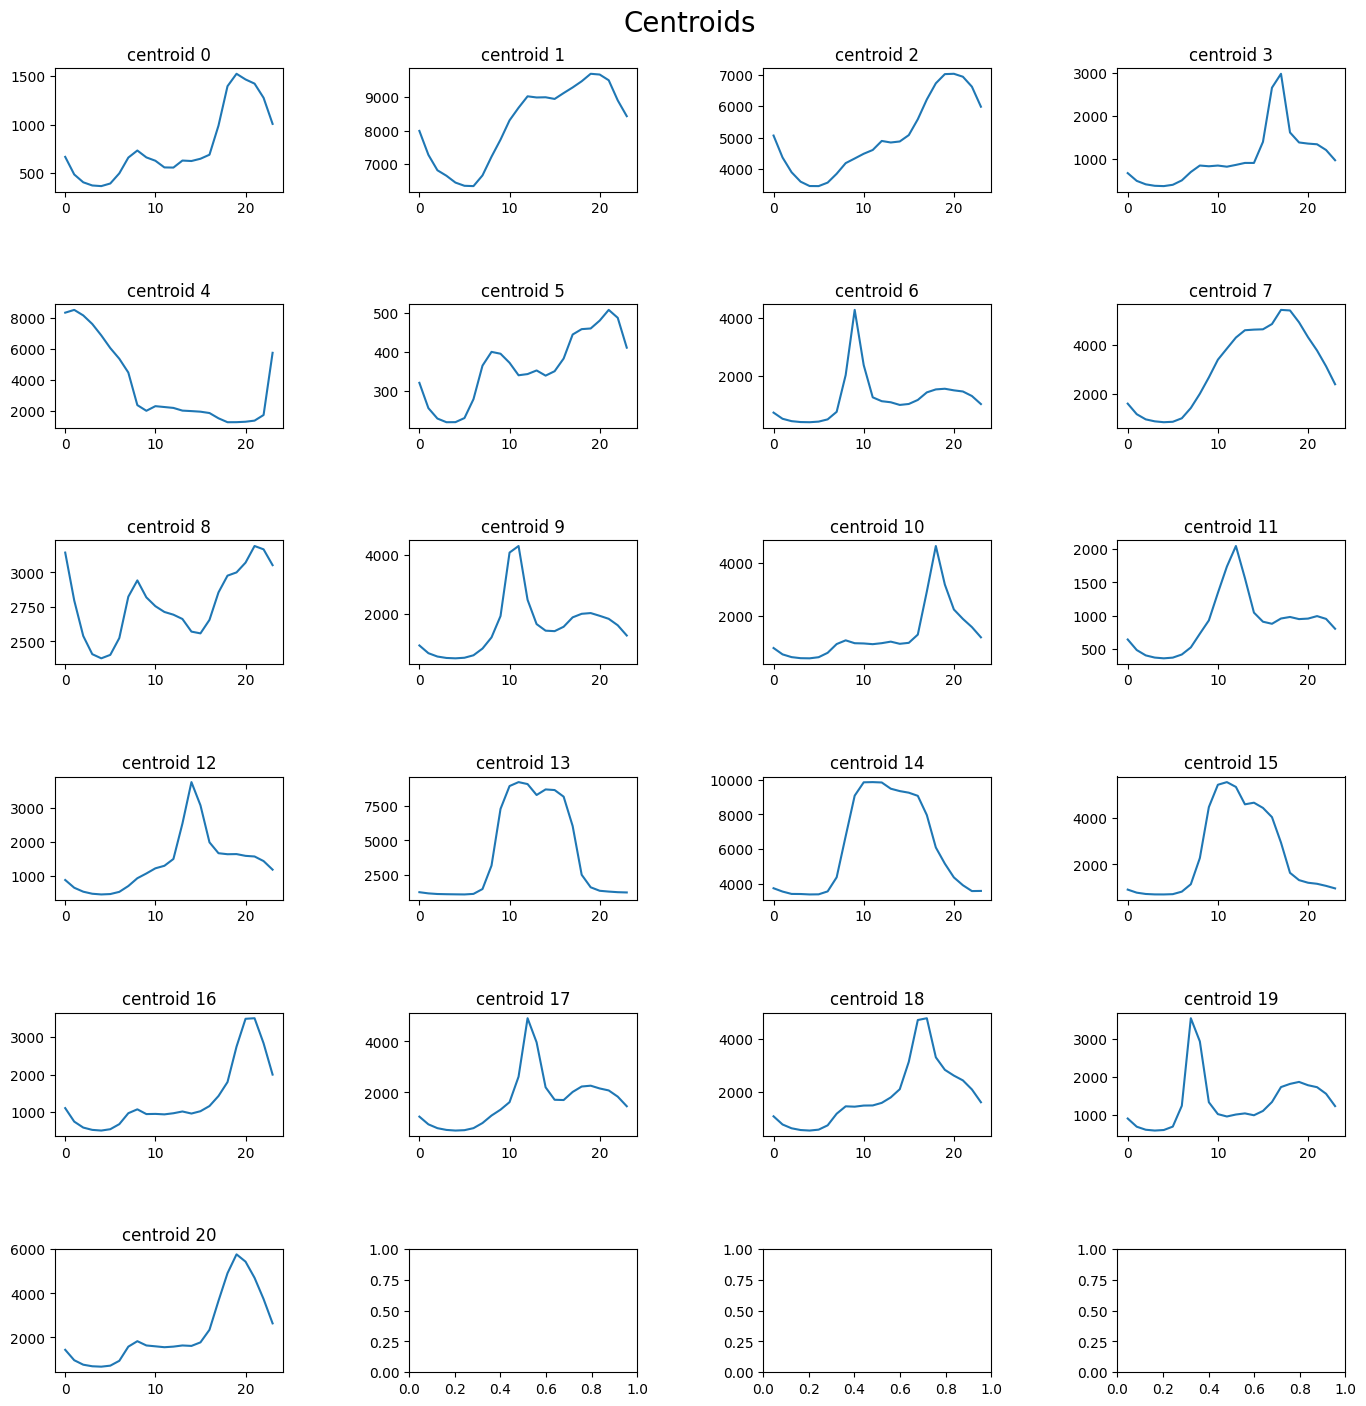

In [56]:
M =6
N= 4
fig, axs = plt.subplots(M, N,figsize=(15,15))
fig.tight_layout(pad=6.0)
fig.suptitle('Centroids', fontsize=20)
centroids_id = 0
for i in range(M):
    for j in range(N):
            if centroids_id<len(centroids):
                axs[i,j].plot(dfCentroids.iloc[centroids_id])
                axs[i, j].set_title("centroid " + str(centroids_id))
                centroids_id+=1

## Imaging Time Series

### Modelling Neural Network Input Week Time series as 2D images

Each weekly consumption time series is converted to a 2D image format that can be manipulated by the deep learning algorithms.

In [9]:
ts_week = data_with_no_next_day_row.iloc[0]
gaf_ts_sum = image_processing.transformImageWithGramianAngularField(ts_week, method='summation')
gaf_ts_diff = image_processing.transformImageWithGramianAngularField(ts_week, method='difference')

**Example of first week consumption of time series dataframe**

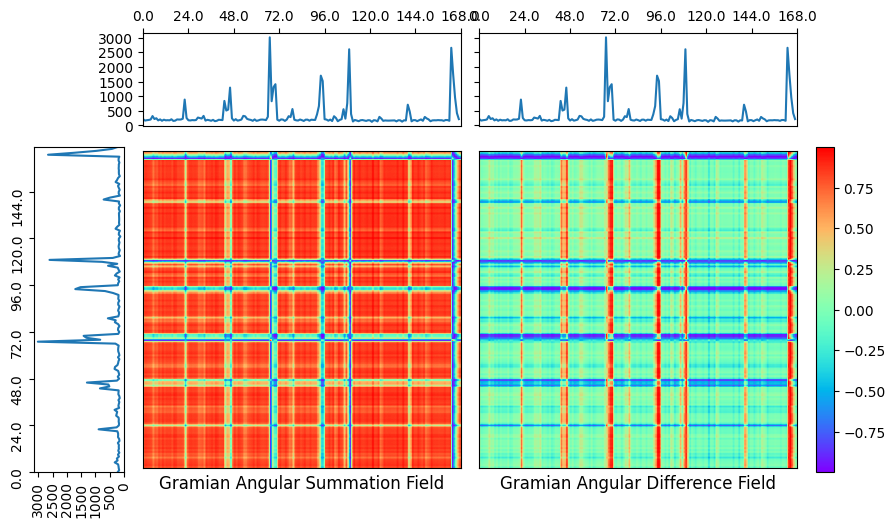

In [10]:
image_processing.plotGramianAngularField (ts_week,gaf_ts_sum,gaf_ts_diff)

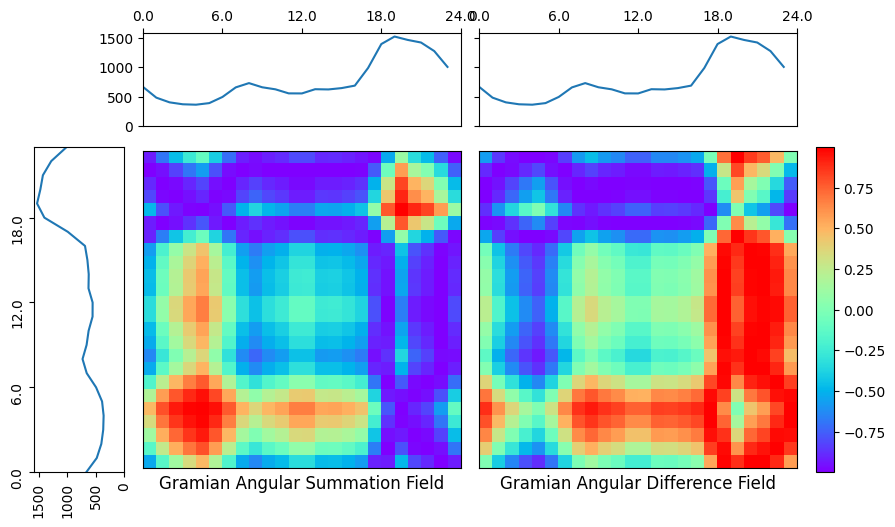

In [9]:
dfCentroids = dfCentroids.round(0)
dfCentroids = dfCentroids.astype(int)
ts_cluster = dfCentroids.iloc[0]
gaf_ts_sum = image_processing.transformImageWithGramianAngularField(ts_cluster, method='summation')
gaf_ts_diff = image_processing.transformImageWithGramianAngularField(ts_cluster, method='difference')
image_processing.plotGramianAngularField (ts_cluster,gaf_ts_sum,gaf_ts_diff,type='cluster')